# Titanic Dataset Cleaning Project

## Overview
In this project, we aim to clean the Titanic dataset to prepare it for further analysis and predictive modeling regarding passenger survival. This notebook documents the data cleaning process step by step.

---

## Table of Contents
1. [Import Libraries](#1-import-libraries)
2. [Load the Data](#2-load-the-data)
3. [Initial Data Exploration](#3-initial-data-exploration)
4. [Identifying Missing Values](#4-identifying-missing-values)
5. [Handling Missing Values](#5-handling-missing-values)
6. [Handling Duplicates](#6-handling-duplicates)
7. [Data Type Conversion](#7-data-type-conversion)
8. [Feature Engineering](#8-feature-engineering)
9. [Removing Unnecessary Columns](#9-removing-unnecessary-columns)
10. [Outlier Detection](#10-outlier-detection)
11. [Final Review of the Cleaned Data](#11-final-review-of-the-cleaned-data)
12. [Next Steps](#12-next-steps)

---



## 1. Import Libraries 

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the Data

In [88]:
titanic_df = pd.read_csv('Data/Titanic dataset.csv')

## 3. Initial Data Exploration

In [89]:
# displaying the shape of the Titanic DataFrame
print(f'The Titanic DataFrame has {titanic_df.shape[1]} columns and {titanic_df.shape[0]} rows')

The Titanic DataFrame has 12 columns and 418 rows


In [90]:
# displaying the first few rows of the Titanic DataFrame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
# displaying information about the Titanic DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [92]:
# displaying summary statistics
titanic_df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


## 4. Identifying Missing Values

In [93]:
# checking for missing values in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 5. Handling Missing Values

In [94]:
# filling missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# filling missing Fare value with the median age
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# filling  missing Embarked values with the most common value
titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0], inplace=True)


## 6. Handling Duplicates

In [95]:
# removing duplicate rows
titanic_df.drop_duplicates(inplace=True)

## 7. Data Type Conversion

In [96]:
# converting categorical columns to category data type
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')


## 8. Feature Engineering

In [97]:
# creating a Family Size feature
titanic_df['Family_Size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# creating Title feature from Name column
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,3,Mrs


## 9. Removing Unnecessary Columns

In [98]:
# droping the columns that are not useful for analysis
titanic_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

## 10. Outlier Detection

In [99]:
# removing extreme Fare values
titanic_df = titanic_df[titanic_df['Fare'] < 300]

# removing extreme Age values
titanic_df = titanic_df[titanic_df['Age'] > 1]

## 11. Final Review of the Cleaned Data

In [100]:
# showing the cleaned Titanic DataFrame information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  409 non-null    int64   
 1   Survived     409 non-null    int64   
 2   Pclass       409 non-null    int64   
 3   Name         409 non-null    object  
 4   Sex          409 non-null    category
 5   Age          409 non-null    float64 
 6   SibSp        409 non-null    int64   
 7   Parch        409 non-null    int64   
 8   Fare         409 non-null    float64 
 9   Embarked     409 non-null    category
 10  Family_Size  409 non-null    int64   
 11  Title        409 non-null    object  
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 36.2+ KB


## 12. Next Steps

### A. Exploratory Data Analysis (EDA)
1. [Visualization of Survival Rates](#1-visualization-of-survival-rates) 
2. [Age Distribution Analysis](#2-age-distribution-analysis)
3. [Family Size Impact](#3-family-size-impact)
4. [Correlation Analysis](#4-correlation-analysis)
5. [Categorical Feature Analysis](#5-categorical-feature-analysis)

#### 1. Visualization of Survival Rates

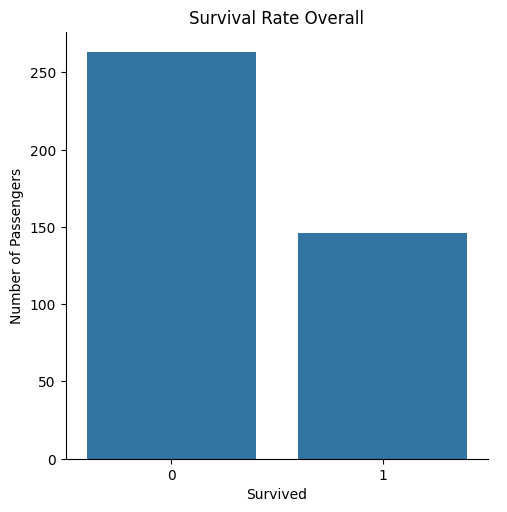

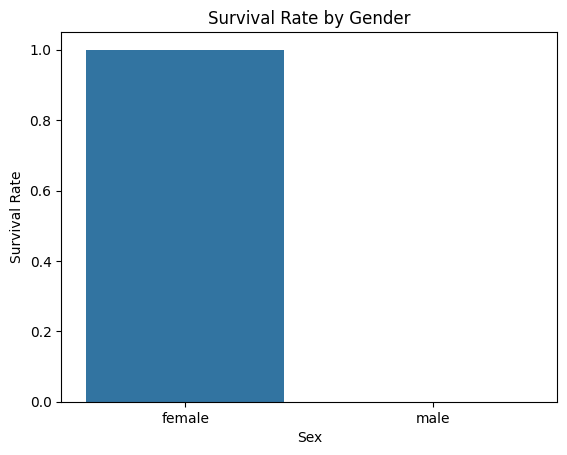

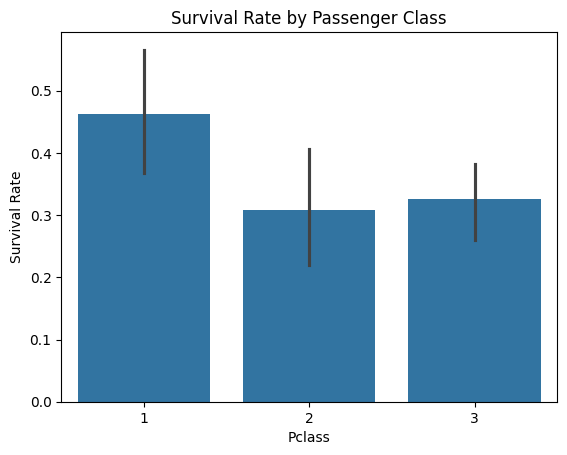

In [101]:
sns.catplot(x = "Survived", data= titanic_df, kind="count")
plt.title('Survival Rate Overall')
plt.ylabel('Number of Passengers')
plt.show()

sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


#### 2. Age Distribution Analysis

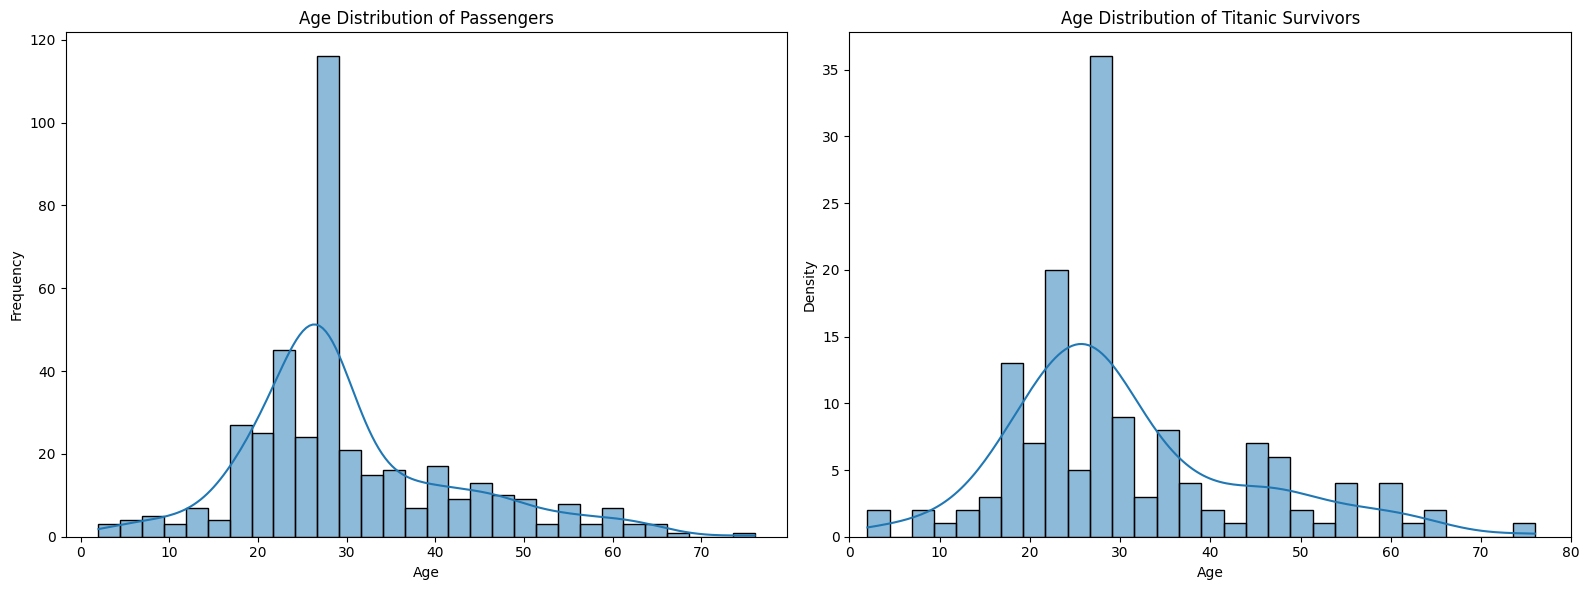

In [102]:
# setting up the figure
plt.figure(figsize=(16, 6))

# age distribution for all passengers
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')


# filtering the dataset to include only survivors
survivors = titanic_df[titanic_df['Survived'] == 1]

# age distribution of survivors
plt.subplot(1, 2, 2)
sns.histplot(survivors['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, 80)  # Limit the x-axis for better visualization
plt.tight_layout()

# showing both plots
plt.tight_layout()
plt.show()

#### 3. Family Size Impact

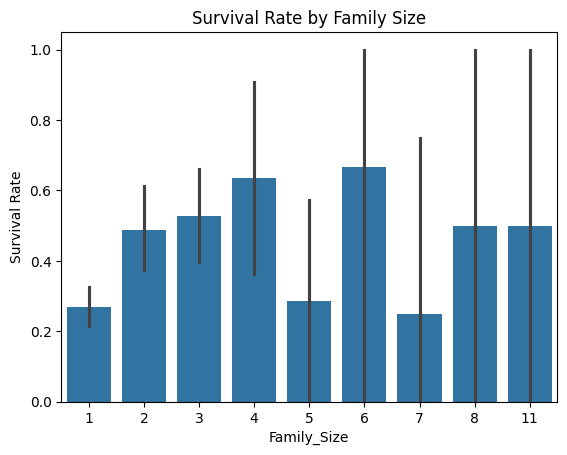

In [103]:
sns.barplot(x='Family_Size', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()


#### 4. Correlation Analysis

/var/folders/vs/v61gwhhn7c939kjnl5kdlwbr0000gn/T/ipykernel_74709/1068738333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


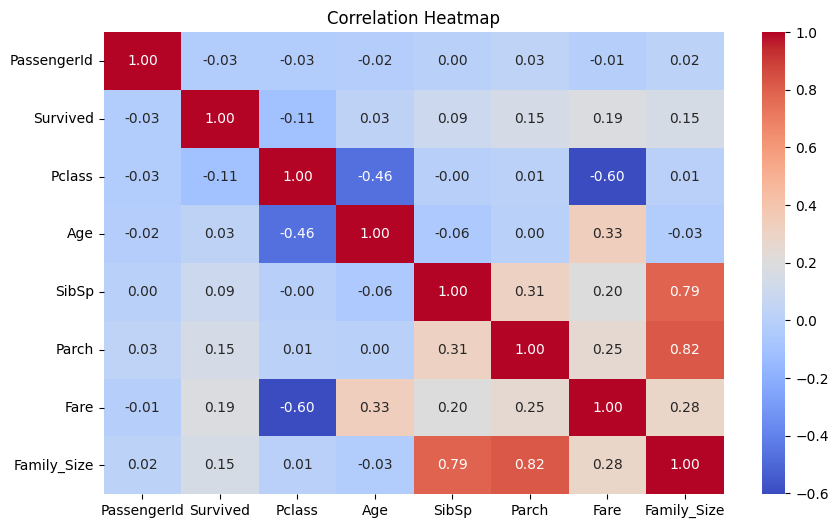

In [104]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### 5. Categorical Feature Analysis

Survived    0   1
Pclass           
1          57  49
2          63  28
3         143  69


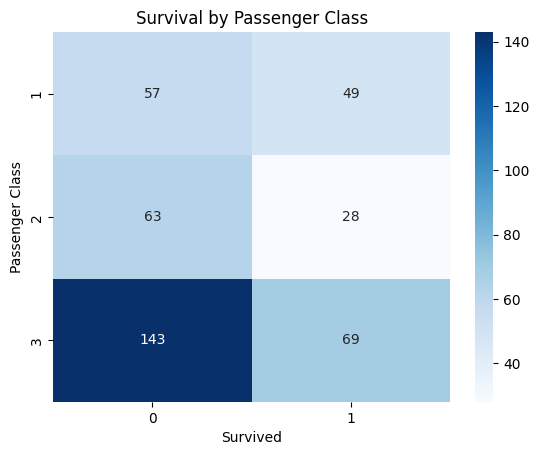

In [105]:
crosstab = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')
plt.title('Survival by Passenger Class')
plt.ylabel('Passenger Class')
plt.xlabel('Survived')
plt.show()


##### Metrics for gaining insights

In [106]:
# number of survivors 
percentage_of_survivors = titanic_df["Survived"].value_counts(normalize=True)[1] * 100
print(f'Total survivors: {percentage_of_survivors.round(2)}% \n')

# survivors by gender
survivor_counts = titanic_df.groupby('Sex')['Survived'].value_counts().unstack()
# percentages
survivor_percentages = (survivor_counts / survivor_counts.sum()) * 100
female_survaviors_percentage = survivor_percentages.loc['female', 1]

print(f'Female survivors: {female_survaviors_percentage}% \n')


# survivors by class
survivor_counts = titanic_df.groupby('Pclass')['Survived'].value_counts().unstack()
survivor_percentages = ((survivor_counts / survivor_counts.sum()) * 100).round(2)
print(f'1st Class survivors : {survivor_percentages.loc[1, 1]}%')
print(f'2nd Class survivors: {survivor_percentages.loc[2, 1]}%')
print(f'3ed Class survivors: {survivor_percentages.loc[3, 1]}%')

Total survivors: 35.7% 

Female survivors: 100.0% 

1st Class survivors : 33.56%
2nd Class survivors: 19.18%
3ed Class survivors: 47.26%


### B. Conclusion

#### 1. Reflecting on Insights Gained
In summary, our analysis of the Titanic dataset has revealed several key insights:
- **Gender Impact**: Women had a survival rate of 100%, compared to 0% for men, indicating the significance of gender in survival.
- **Socioeconomic Status**: Passengers in 1st class had a survival rate of 47.2%, revealing how class status has not influenced survival chances.
- **Age and Family Dynamics**: Family size appeared to correlate with better survival rates, while younger children generally fared better than older adults.

The tragic sinking of the Titanic serves as a poignant reminder of how critical gender and class played roles in survival during one of the most famous maritime disasters in history.

#### 2. Limitations
While this analysis provides valuable insights, it is essential to acknowledge some limitations:
- **Incomplete Data**: The dataset has missing entries in several key columns, which might affect the analysis outcomes.
- **Simplification of Factors**: Many other factors influencing survival, such as social connections and crew behavior, were not considered.
- **Sampling Bias**: The dataset may not represent the entire Titanic population. 

#### 3. Future Directions
Given these insights, there are several potential avenues for future research:
- **Machine Learning Applications**: Future studies could employ predictive models to evaluate survival chances based on passenger characteristics.
- **Broader Datasets**: Accessing additional data sources could provide a deeper understanding of survivor demographics and behaviors.
- **Comparative Studies**: Similar analyses on other maritime disasters could yield insights into trends and safety protocols.

Overall, this analysis not only sheds light on the past but also offers lessons relevant to contemporary discussions about safety and protocol in large-scale maritime travel and emergency preparedness.
